In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import metrics
from sklearn.datasets import load_iris

In [6]:
iris_data =load_iris(as_frame=True)['frame']
iris_unsurpervised = load_iris(as_frame=True)['data']

In [7]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_unsurpervised.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris_unsurpervised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
iris_unsurpervised.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


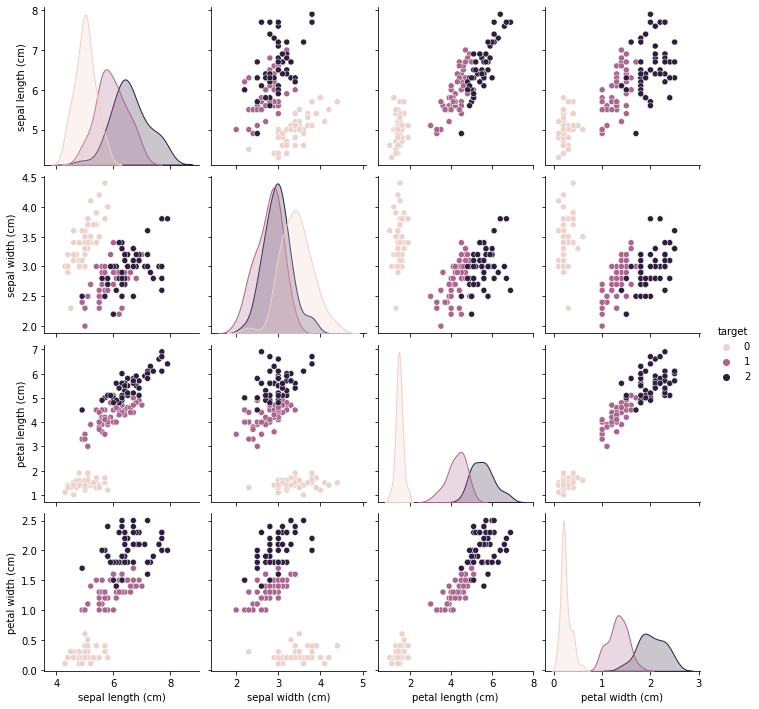

In [11]:
sns.pairplot(iris_data, hue='target')

Text(0.5, 1.0, 'ELBOW METHOD')

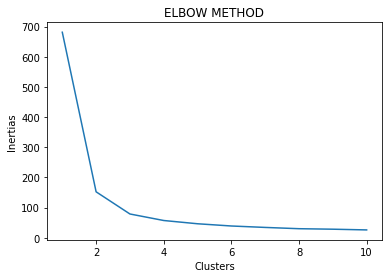

In [14]:
inertias =[]
clusters = list(range(1,11))
for cluster in clusters:
 kmeans = KMeans(n_clusters=cluster)
 kmeans.fit(iris_unsurpervised)
 inertias.append(kmeans.inertia_)
plt.plot(clusters, inertias)
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.title('ELBOW METHOD')


In [15]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(iris_unsurpervised)


In [16]:
metrics.silhouette_score(iris_unsurpervised, labels)

0.5528190123564102

Text(0.5, 1.0, 'CLUSTER VISUALIZATION')

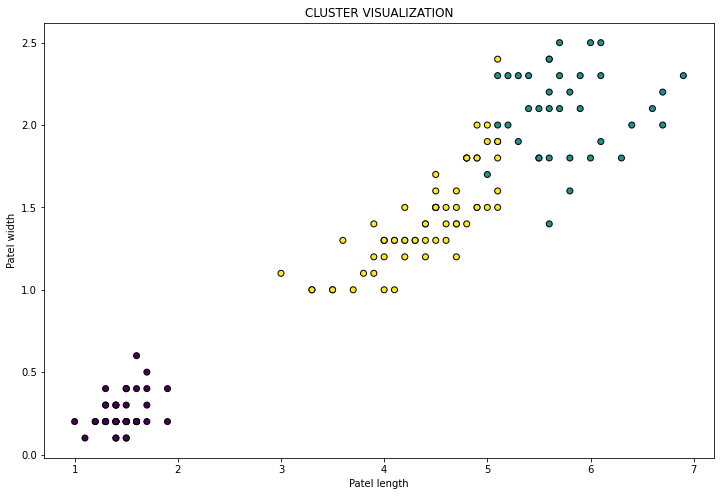

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(iris_unsurpervised['petal length (cm)'],
            iris_unsurpervised['petal width (cm)'],
            c = labels, edgecolors='k')
plt.xlabel('Patel length')
plt.ylabel('Patel width')
plt.title('CLUSTER VISUALIZATION')

Text(0.5, 1.0, 'Hierachical Clustering')

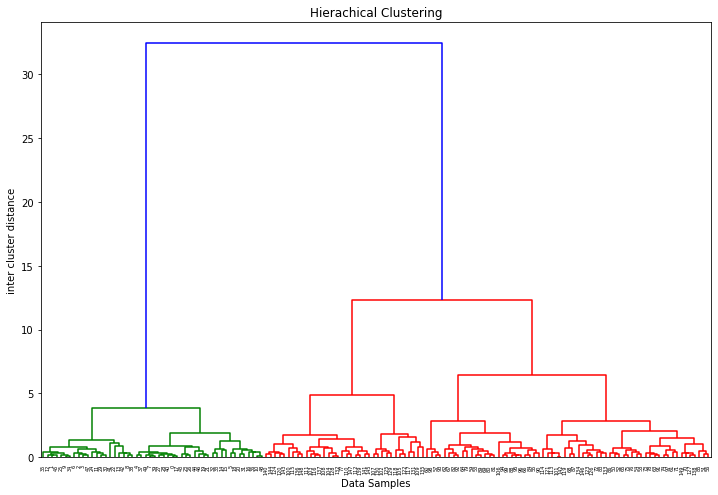

In [19]:
linkage_matrix = linkage(iris_unsurpervised, method ='ward', metric='euclidean')
plt.figure(figsize=(12,8))
dendrogram(linkage_matrix)
plt.xlabel('Data Samples')
plt.ylabel('inter cluster distance')
plt.title('Hierachical Clustering')

In [20]:
labels_hierarchical = fcluster(linkage_matrix, 3, criterion = 'maxclust')

In [21]:
metrics.silhouette_score(iris_unsupervised, labels_hierarchical)

NameError: ignored

Text(0.5, 1.0, 'CLUSTER VISUALIZATION')

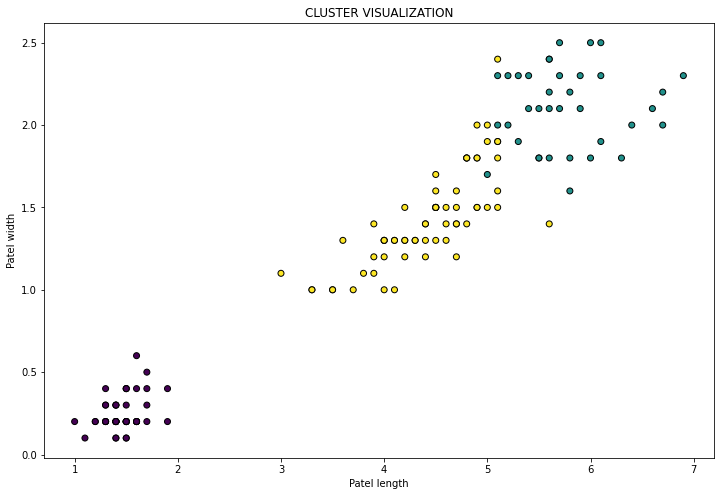

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(iris_unsurpervised['petal length (cm)'],
            iris_unsurpervised['petal width (cm)'],
            c = labels_hierarchical, edgecolors='k')
plt.xlabel('Patel length')
plt.ylabel('Patel width')
plt.title('CLUSTER VISUALIZATION')